In [17]:
import random

def generate_connected_weighted_graph_adj_matrix(num_vertices, num_edges):
    # Initialize the adjacency matrix with all zeroes
    adjacency_matrix = [[0 for j in range(num_vertices)] for i in range(num_vertices)]
    
    # Generate a random permutation of the vertices (except for the first vertex)
    perm = random.sample(range(1, num_vertices), num_vertices - 1)
    
    # Connect the first vertex to the second vertex in the permutation with a random weight
    weight = random.randint(1, 10)
    adjacency_matrix[0][perm[0]] = weight
    
    # Connect the rest of the vertices to their previous vertex in the permutation
    for i in range(1, num_vertices - 1):
        j = i - 1
        weight = random.randint(1, 10)
        adjacency_matrix[perm[i]][perm[j]] = weight
    
    # Add additional edges until the desired number of edges is reached
    num_added_edges = num_vertices - 1
    while num_added_edges < num_edges:
        # Choose two random vertices
        i = random.randint(0, num_vertices-1)
        j = random.randint(0, num_vertices-1)
        # Make sure the vertices are not already connected and not the same vertex
        if i != j and adjacency_matrix[i][j] == 0:
            # Connect the vertices with a random weight
            weight = random.randint(1, 10)
            adjacency_matrix[i][j] = weight
            num_added_edges += 1
            # Check if the additional edge disconnects any vertices from the first vertex
            visited = [False for k in range(num_vertices)]
            visited[0] = True
            queue = [0]
            while queue:
                curr = queue.pop(0)
                for k in range(num_vertices):
                    if adjacency_matrix[curr][k] != 0 and not visited[k]:
                        visited[k] = True
                        queue.append(k)
            if not all(visited):
                # If any vertex is not reachable from the first vertex, remove the edge
                adjacency_matrix[i][j] = 0
                num_added_edges -= 1
    
    return adjacency_matrix

print(generate_connected_weighted_graph_adj_matrix(10, 15))


#Note that for a connected graph(we want this for this exercise) num_edges has to be between (more than or equal to/less than or equal to) num_vertices and (num_vertices * (num_vertices-1))/2
def generate_graph_adj_lists(num_vertices, num_edges):
    # create an empty graph with num_vertices vertices
    graph = [[] for _ in range(num_vertices)]
    # make sure the graph is connected by starting with a tree
    tree_edges = num_vertices - 1
    for i in range(tree_edges):
        graph[i].append(i+1)
        graph[i+1].append(i)
    # add additional edges until we reach the desired number of edges
    while tree_edges < num_edges:
        u = random.randint(0, num_vertices-1)
        v = random.randint(0, num_vertices-1)
        if u != v and v not in graph[u]:
            graph[u].append(v)
            graph[v].append(u)
            tree_edges += 1
    return graph


[[0, 10, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 9, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 10], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 5, 9, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 6, 0]]


[[0, 0, 0, 1, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 10, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [10, 0, 0, 0, 6, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 9, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 9], [0, 3, 2, 0, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 0, 10, 0, 0, 0]]

([0, 14, 13, 1, 24, 21, 6, 25, 11, 34], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 8, 8, 0, 1, 2, 0, 5, 3, 7])


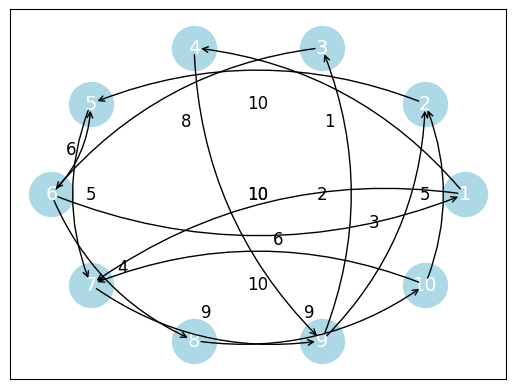

In [42]:
#For the adjaceny matrix (PART1 OF NOTES)

#change parameters 
graph1 = generate_connected_weighted_graph_adj_matrix(10,15)


num_vertices = 10 #update this too when changing the 5 above
start = 0 
import math

#start timer here, after generating grpah
def dijkstra_adj_m(graph, start):
    # Initialize distance and visited arrays
    
    d = [math.inf] * num_vertices
    pi = [0] * num_vertices
    S = [0] * num_vertices
    
    # Set the distance of the starting node to 0
    d[start] = 0
    
    # Initialize the priority queue
    pq = [i for i in range(num_vertices)]
    pq[0] =  0  # move start node to front of queue
    
    while pq:
        # Pop the node with the smallest distance from the priority queue
        u = pq.pop(0)

        S[u] = 1
        
        # Update the distances of the neighboring nodes
        for v in range(num_vertices):
            if graph[u][v] > 0 and S[v] != 1:
                new_dist = d[u] + graph[u][v]
                if new_dist < d[v]:
                    d[v] = new_dist
                    pi[v] = u
        
        # Re-sort the priority queue based on the updated distances
        pq.sort(key=lambda x: d[x])
    
    return d,S,pi



print(graph1)
print()
#start timer here ganesh
print(dijkstra_adj_m(graph1, start))
#stop timer here ganesh



#below plots the graph to check if the algorithm is working, can use for slides later

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

adj_matrix = graph1

def plot_graph(adj_matrix):
    fig, ax = plt.subplots()
    
    # Create a directed graph
    G = nx.DiGraph()
    
    
    # Add nodes
    num_vertices = len(adj_matrix)
    nodes = range(num_vertices)
    G.add_nodes_from(nodes)
    
    # Add edges
    for i in range(num_vertices):
        for j in range(num_vertices):
            weight = adj_matrix[i][j]
            if weight != 0:
                G.add_edge(i, j, weight=weight)
    
    # Get node positions using a circular layout
    pos = nx.circular_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, ax=ax)
    
    # Draw node labels
    labels = {i: i+1 for i in range(num_vertices)} # node labels are 1-based indices
    nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='white', ax=ax)
    
    # Draw edges with arrows
    for edge in G.edges():
        start = edge[0]
        end = edge[1]
        weight = G[start][end]['weight']
        ax.annotate("",
                    xy=pos[end], xycoords='data',
                    xytext=pos[start], textcoords='data',
                    arrowprops=dict(arrowstyle="->", color="black",
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=0.2",
                                    ),
                    )
        ax.annotate(weight,
                    xy=((pos[start][0] + pos[end][0])/2, (pos[start][1] + pos[end][1])/2),
                    xycoords='data',
                    fontsize=12,
                    ha='center', va='center')
    
    # Set axis limits and remove ticks
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Show the plot
    plt.show()


plot_graph(adj_matrix)

In [36]:
#For the adjaceny list
graph1 = generate_graph_adj_lists(10,10)

num_vertices = 10 #update this too when changing the 5 above
start = 0 
import heapq

#start timer here
def dijkstra_adj_l(graph, start):
    # Initialize distances dictionary with infinity for all vertices except start
    d = [math.inf] * num_vertices #track shortest distances
    pi = [0] * num_vertices #track prev for each vertex
    S = [0] * num_vertices #track visited

    # Initialize priority queue with start vertex and distance 0
    pq = [(0, start)]
    d[start] = 0

    while pq:
        # Extract vertex with minimum distance from priority queue
        dist, u = heapq.heappop(pq)
        
        # If vertex already visited, continue to next iteration
        if S[u]:
            continue
        
        # Mark vertex as visited
        S[u] = True
        
        # Update distances and previous vertices for adjacent vertices
        for neighbour in graph[u]:
            if not S[neighbour]:
                alt = dist + 1
                if alt < d[neighbour]:
                    d[neighbour] = alt
                    pi[neighbour] = u
                    heapq.heappush(pq, (alt,neighbour))
    
    return d, pi, S



print(graph1)
print()
#start timer here
print(dijkstra_adj_l(graph1, start))
#stop timer here


[[1], [0, 2], [1, 3], [2, 4], [3, 5, 7], [4, 6], [5, 7], [6, 8, 4], [7, 9], [8]]

([0, 1, 2, 3, 4, 5, 6, 5, 6, 7], [0, 0, 1, 2, 3, 4, 5, 4, 7, 8], [True, True, True, True, True, True, True, True, True, True])


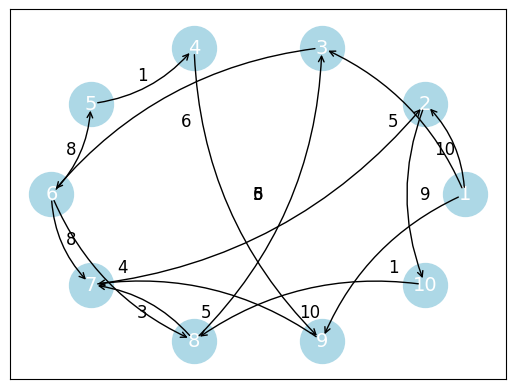

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

adj_matrix = graph1

def plot_graph(adj_matrix):
    fig, ax = plt.subplots()
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes
    num_vertices = len(adj_matrix)
    nodes = range(num_vertices)
    G.add_nodes_from(nodes)
    
    # Add edges
    for i in range(num_vertices):
        for j in range(num_vertices):
            weight = adj_matrix[i][j]
            if weight != 0:
                G.add_edge(i, j, weight=weight)
    
    # Get node positions using a circular layout
    pos = nx.circular_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, ax=ax)
    
    # Draw node labels
    labels = {i: i+1 for i in range(num_vertices)} # node labels are 1-based indices
    nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='white', ax=ax)
    
    # Draw edges with arrows
    for edge in G.edges():
        start = edge[0]
        end = edge[1]
        weight = G[start][end]['weight']
        ax.annotate("",
                    xy=pos[end], xycoords='data',
                    xytext=pos[start], textcoords='data',
                    arrowprops=dict(arrowstyle="->", color="black",
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=0.2",
                                    ),
                    )
        ax.annotate(weight,
                    xy=((pos[start][0] + pos[end][0])/2, (pos[start][1] + pos[end][1])/2),
                    xycoords='data',
                    fontsize=12,
                    ha='center', va='center')
    
    # Set axis limits and remove ticks
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Show the plot
    plt.show()


plot_graph(adj_matrix)